In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

## Reading the data

In [23]:
data = pd.read_csv("Dry_Bean.csv")

In [24]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [25]:
data.shape

(13611, 17)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [27]:
features = data.columns.to_list()

In [28]:
target  = 'Class'

In [29]:
features.remove(target)


In [30]:
X= data[features].values

In [31]:
Y=  data[target].values

## Spliting Data

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [34]:
x_train.shape

(10888, 16)

In [35]:
x_test.shape

(2723, 16)

In [36]:
y_train.shape

(10888,)

In [37]:
y_test.shape

(2723,)

### 1 Random Forrest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_clf = RandomForestClassifier()

In [40]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = rf_clf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.92      0.93       257
      BOMBAY       1.00      1.00      1.00        96
        CALI       0.92      0.94      0.93       338
    DERMASON       0.89      0.93      0.91       723
       HOROZ       0.96      0.94      0.95       399
       SEKER       0.95      0.92      0.94       390
        SIRA       0.87      0.85      0.86       520

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [44]:
confusion_matrix(y_test, y_pred)

array([[237,   0,  14,   0,   1,   0,   5],
       [  0,  96,   0,   0,   0,   0,   0],
       [ 10,   0, 318,   0,   7,   0,   3],
       [  0,   0,   0, 671,   1,   9,  42],
       [  1,   0,  10,   3, 376,   0,   9],
       [  3,   0,   0,  21,   0, 358,   8],
       [  1,   0,   2,  59,   8,   8, 442]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred)

0.9173705471905986

In [46]:
ac1= accuracy_score(y_true=y_test, y_pred=y_pred)*100

In [47]:
print("Accuracy of testing data:", ac1)

Accuracy of testing data: 91.73705471905987


### 2 AdaBoost Classifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
adb_clf = AdaBoostClassifier()

In [50]:
adb_clf.fit(x_train, y_train)

AdaBoostClassifier()

In [51]:
y_pred = adb_clf.predict(x_test)

In [52]:
confusion_matrix(y_test, y_pred)

array([[  0,   0, 221,   0,   0,   0,  36],
       [ 96,   0,   0,   0,   0,   0,   0],
       [  0,   0, 335,   0,   2,   0,   1],
       [  0,   0,   0, 722,   0,   0,   1],
       [  0,   0,  60,  28, 276,   0,  35],
       [  0,   0,   0, 275,   0,  84,  31],
       [  0,   0,  10, 153,   9,   5, 343]], dtype=int64)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       257
      BOMBAY       0.00      0.00      0.00        96
        CALI       0.54      0.99      0.70       338
    DERMASON       0.61      1.00      0.76       723
       HOROZ       0.96      0.69      0.80       399
       SEKER       0.94      0.22      0.35       390
        SIRA       0.77      0.66      0.71       520

    accuracy                           0.65      2723
   macro avg       0.55      0.51      0.47      2723
weighted avg       0.65      0.65      0.59      2723



C:\Users\ADMIN\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.646345941975762

In [55]:
ac2=accuracy_score(y_test, y_pred)*100

In [56]:
print("Accuracy of testing data:", ac2)

Accuracy of testing data: 64.6345941975762


### 3 XGBoost Classifier

In [58]:
import xgboost as xgb

In [59]:
xgb_clf = xgb.XGBClassifier()

In [60]:
y_train_mod = y_train
y_test_mod = y_test

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_mod = le.fit_transform(y_train)

In [62]:
xgb_clf.fit(x_train, y_train_mod)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [63]:
y_pred = xgb_clf.predict(x_test)

In [64]:
y_test_mod=le.fit_transform(y_test)

In [65]:
confusion_matrix(y_test_mod , y_pred)

array([[243,   0,  11,   0,   1,   0,   2],
       [  0,  96,   0,   0,   0,   0,   0],
       [  5,   0, 324,   0,   6,   0,   3],
       [  0,   0,   0, 665,   1,  10,  47],
       [  3,   0,   6,   4, 380,   0,   6],
       [  2,   0,   0,  17,   0, 361,  10],
       [  1,   0,   0,  60,   8,   7, 444]], dtype=int64)

In [66]:
print(classification_report(y_test_mod, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       257
           1       1.00      1.00      1.00        96
           2       0.95      0.96      0.95       338
           3       0.89      0.92      0.91       723
           4       0.96      0.95      0.96       399
           5       0.96      0.93      0.94       390
           6       0.87      0.85      0.86       520

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723



In [67]:
accuracy_score(y_true = y_test_mod, y_pred = y_pred)

0.922879177377892

In [68]:
ac3=accuracy_score(y_test_mod, y_pred)*100

In [69]:
print("Accuracy of test dataset:",ac3)

Accuracy of test dataset: 92.2879177377892


### 3 Performance Comparison

In [70]:
import seaborn as sns

In [71]:
accuracy =  {ac1: 'Random forest', ac2: 'Adaboost', ac3: 'XGboost'}

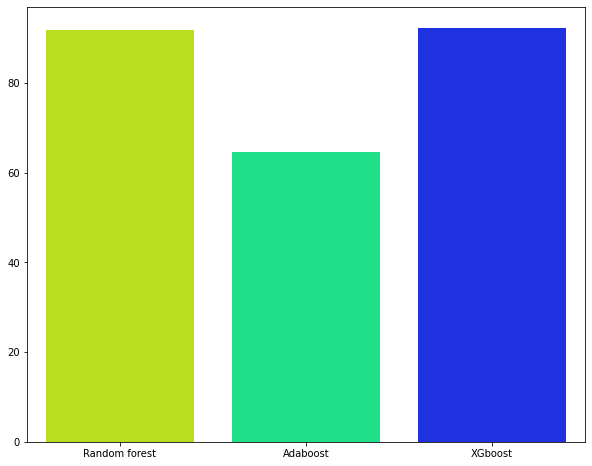

In [72]:
plt.figure(figsize=(10,8))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');